In [ ]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# import dataset

dataset = pd.read_csv('Cleaned-Bank.csv')

In [ ]:
# visulise the data

dataset.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


The dataset looks well formated

In [ ]:
# check the dtypes

dataset.dtypes

,0
Age,int64
Job,object
Marital,object
Education,object
Default,object
Balance,int64
Housing,object
Loan,object
Contact,object
Day,int64


**Q. What is the age range for the contacts?**

In [ ]:
age_descriptive_stat = dataset['Age'].describe()

In [ ]:
# age range

age_range = dataset['Age'].max() - dataset['Age'].min()

In [ ]:
age_descriptive_stat['Range'] = age_range

In [ ]:
age_descriptive_stat

,Age
count,4521.000000
mean,41.170095
std,10.576211
min,19.000000
25%,33.000000
50%,39.000000
75%,49.000000
max,87.000000
Range,68.000000


Well there variety of range starting from 19 ending at old 87.

**Q. which Job Category turned in more term deposits?**

In [ ]:
dataset['Job'].value_counts()

,count
Job,
Management,969
Blue-collar,946
Technician,768
Admin.,478
Services,417
Retired,230
Self-employed,183
Entrepreneur,168
Unemployed,128


In [ ]:
# converting 'Y' to categorical datatype

dataset['Y'] = dataset['Y'].astype('category')

In [ ]:
job_count = dataset.groupby(['Job', 'Y']).size().unstack(fill_value = 0)

<ipython-input-11-7150eeb89260>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_count = dataset.groupby(['Job', 'Y']).size().unstack(fill_value = 0)


In [ ]:
job_count['Count'] = job_count.sum(axis = 1)

In [ ]:
job_count['Yes Percentage'] = (job_count['Yes'] / job_count['Count']) * 100

In [ ]:
job_count

Y,No,Yes,Count,Yes Percentage
Job,,,,
Admin.,420,58,478,12.133891
Blue-collar,877,69,946,7.293869
Entrepreneur,153,15,168,8.928571
Housemaid,98,14,112,12.500000
Management,838,131,969,13.519092
Retired,176,54,230,23.478261
Self-employed,163,20,183,10.928962
Services,379,38,417,9.112710
Student,65,19,84,22.619048


Insights:

1. So Retired, Student & the Unknown, are the top 3 catagories of Jobs that have turned in more term deposits.
2. Since 'Unknown' is amoung top 3 to bring in more term deposits, we need to have meeting with the stakeholders to clarify the reason of this unknown category. Or we can ignore this as the numbers are relatively small to draw conclusion.

In [ ]:
# visulise the headers

dataset.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


**Q. Which Marital category turned-in more Yes?**

In [ ]:
dataset['Marital'].value_counts()

,count
Marital,
Married,2797
Single,1196
Divorced,528


In [ ]:
marital_count = dataset.groupby(['Marital', 'Y']).size().unstack()

<ipython-input-17-965b7f1b727d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_count = dataset.groupby(['Marital', 'Y']).size().unstack()


In [ ]:
marital_count['Count'] = marital_count.sum(axis = 1)

In [ ]:
marital_count['Yes Percentage'] = (marital_count['Yes'] / marital_count['Count']) * 100

In [ ]:
marital_count

Y,No,Yes,Count,Yes Percentage
Marital,,,,
Divorced,451,77,528,14.583333
Married,2520,277,2797,9.903468
Single,1029,167,1196,13.963211


Insights:

1. 'Divorsed' Category seems to turn-in more term deposits followed by 'Single'.
2. The next campaign can target people that dont have any Marital status more.
3. There should be specific strategies to target this category more with.

Disclaimer: Though the 'Married' category turns in less Term Deposit, we shouldn't be insentive toward this category. We should remember, they turn-in 10% of time (approx).

In [ ]:
# visualise the headers

dataset.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


In [ ]:
dataset['Education'].value_counts()

,count
Education,
Secondary,2306
Tertiary,1350
Primary,678
Unknown,187


In [ ]:
education_count = dataset.groupby(['Education', 'Y']).size().unstack()

<ipython-input-23-14d92156e51b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_count = dataset.groupby(['Education', 'Y']).size().unstack()


In [ ]:
education_count['Count'] = education_count.sum(axis = 1)

In [ ]:
education_count['Yes Percentage'] = (education_count['Yes'] / education_count['Count']) * 100

In [ ]:
education_count

Y,No,Yes,Count,Yes Percentage
Education,,,,
Primary,614,64,678,9.439528
Secondary,2061,245,2306,10.624458
Tertiary,1157,193,1350,14.296296
Unknown,168,19,187,10.160428


Insights:

1. A person is much more likely to subscribe, if that person has gone through higher education.

In [ ]:
# visualise the headers

dataset.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No


# Numerical features

In [ ]:
dataset.describe()

,Age,Balance,Day,Duration,Campaign,Pdays,Previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


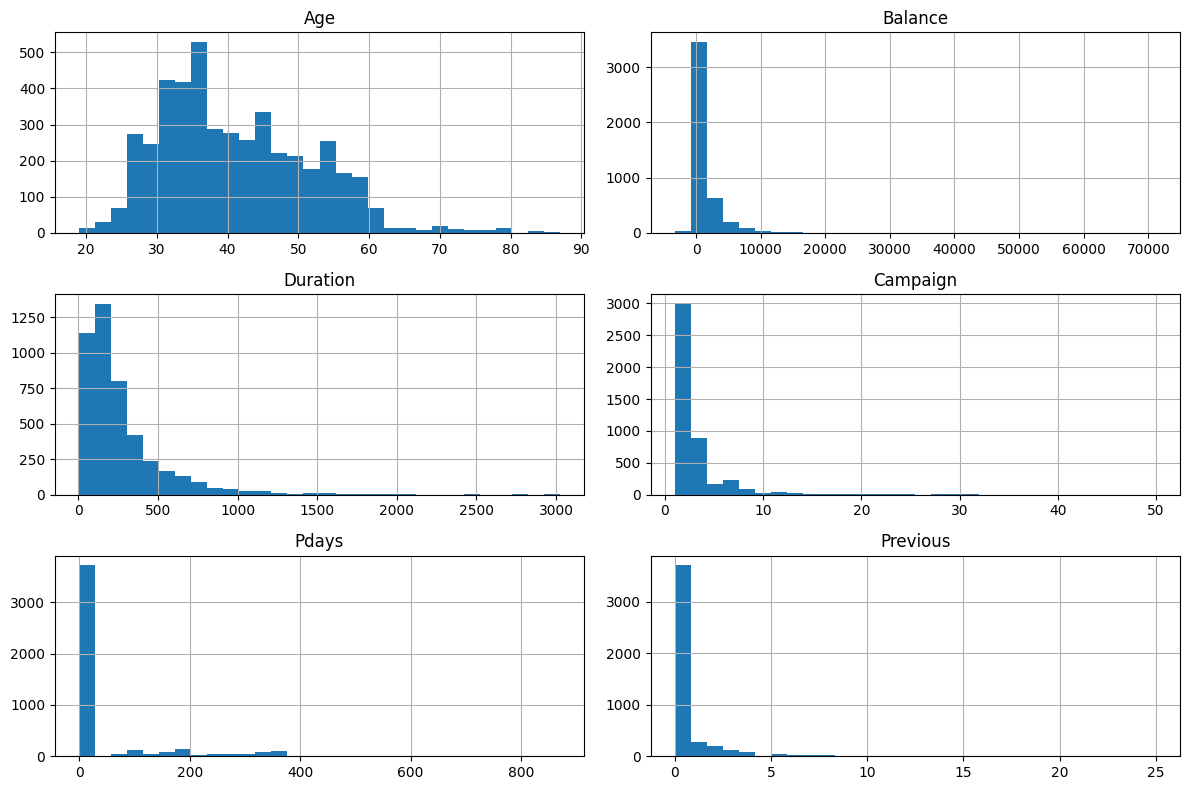

In [ ]:
# Histograms for numerical features
dataset[['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

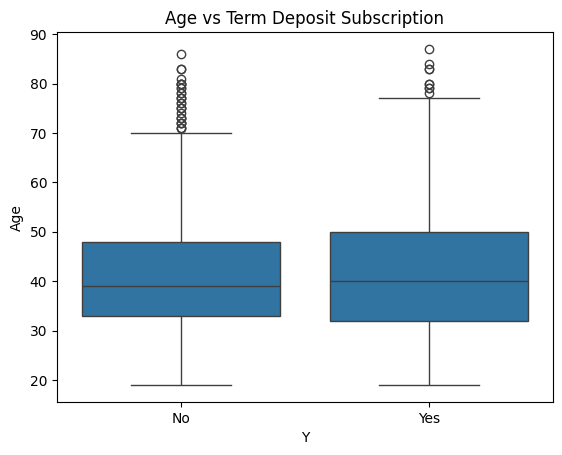

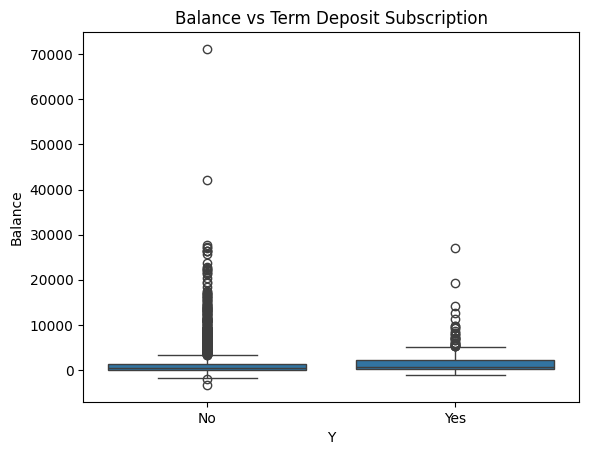

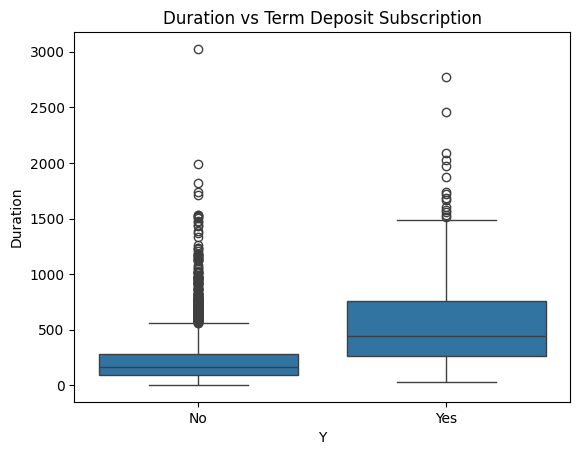

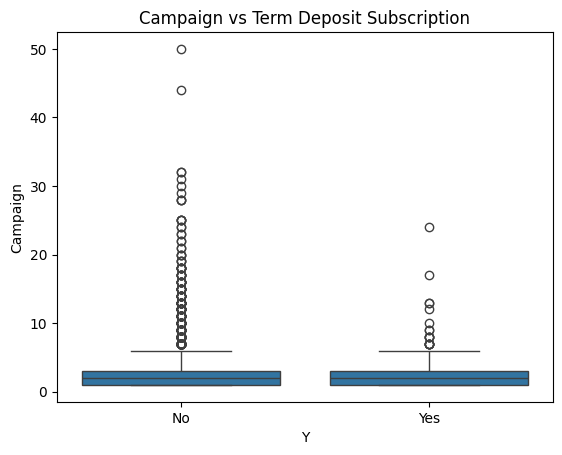

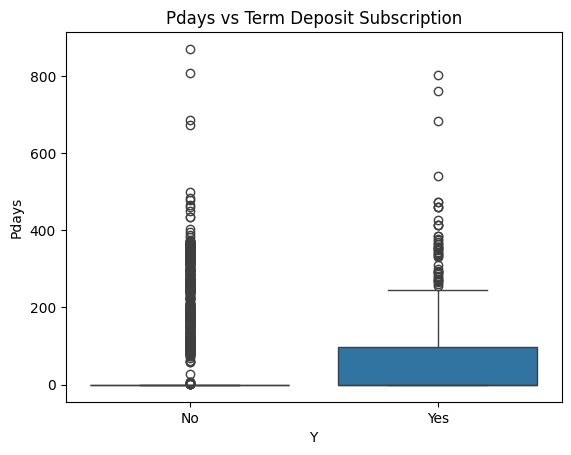

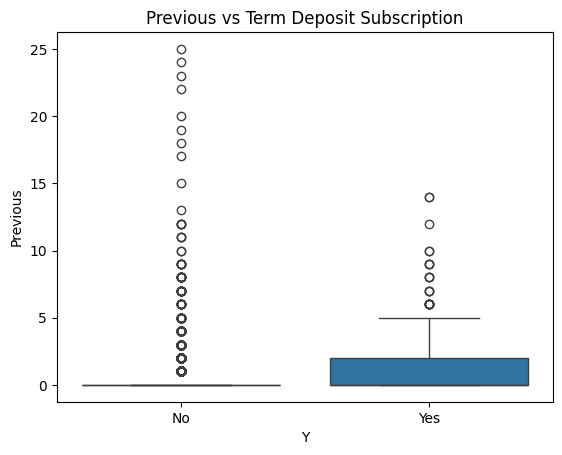

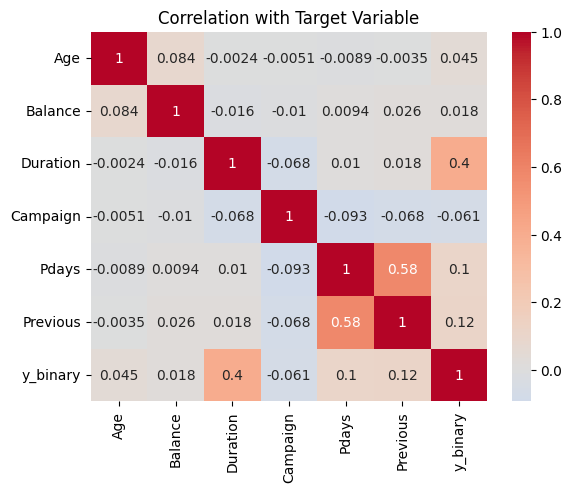

In [ ]:
# Boxplot to see relationship between numerical features and target 'y'

import seaborn as sns

for feature in ['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']:
    sns.boxplot(x='Y', y=feature, data=dataset)
    plt.title(f'{feature} vs Term Deposit Subscription')
    plt.show()

# Correlation matrix (target needs to be encoded into binary format)
dataset['y_binary'] = dataset['Y'].map({'Yes': 1, 'No': 0})  # Convert target to binary
corr = dataset[['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous', 'y_binary']].corr()

# Heatmap for correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation with Target Variable')
plt.show()

In [ ]:
dataset.head()

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y,y_binary
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No,0
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No,0
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No,0
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No,0
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No,0


In [ ]:
from scipy.stats import pointbiserialr


# List of numerical features
numerical_features = ['Age', 'Balance', 'Duration', 'Campaign', 'Pdays', 'Previous']

# Loop through each numerical feature and compute point-biserial correlation with the target
for feature in numerical_features:
    corr, p_value = pointbiserialr(dataset[feature], dataset['y_binary'])
    print(f'Feature: {feature}, Correlation: {corr}, p-value: {p_value}')

Feature: Age, Correlation: 0.04509180287499875, p-value: 0.0024245358173806447
Feature: Balance, Correlation: 0.01790509838763638, p-value: 0.2287158303863065
Feature: Duration, Correlation: 0.4011183032752399, p-value: 2.150444902162731e-174
Feature: Campaign, Correlation: -0.06114743110383131, p-value: 3.8857935712077324e-05
Feature: Pdays, Correlation: 0.104086819409199, p-value: 2.287071248718874e-12
Feature: Previous, Correlation: 0.11671443565541814, p-value: 3.4779706864830296e-15


# Categorical Features

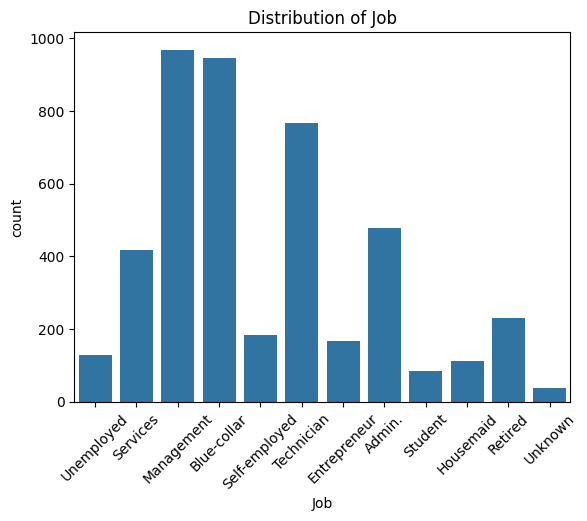

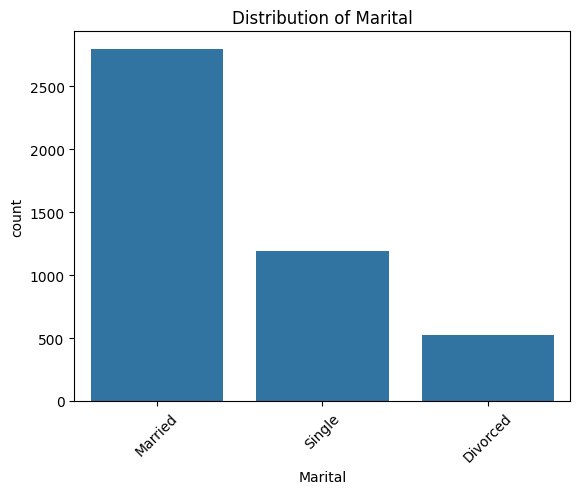

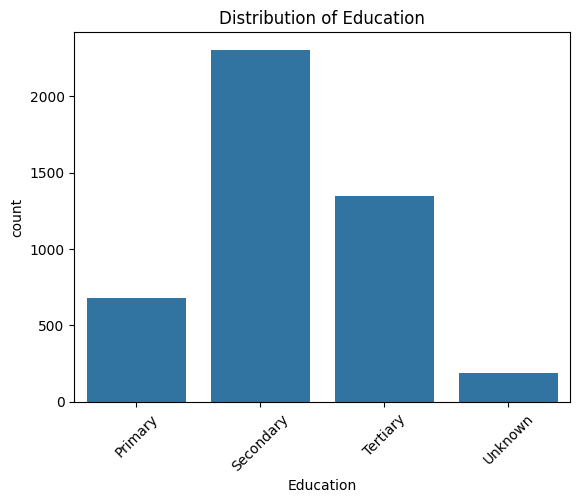

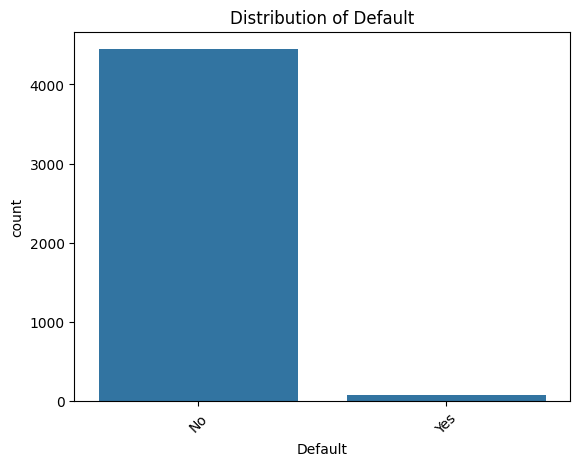

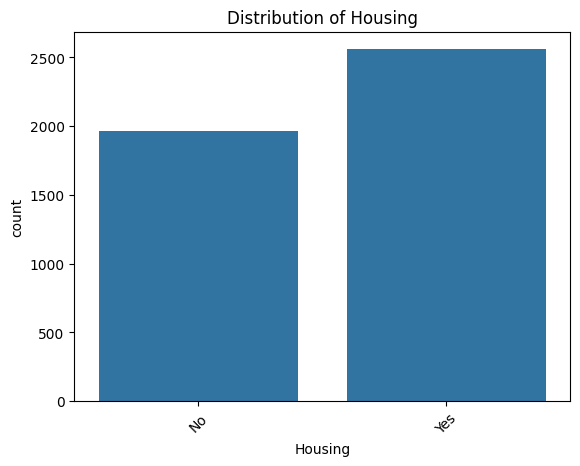

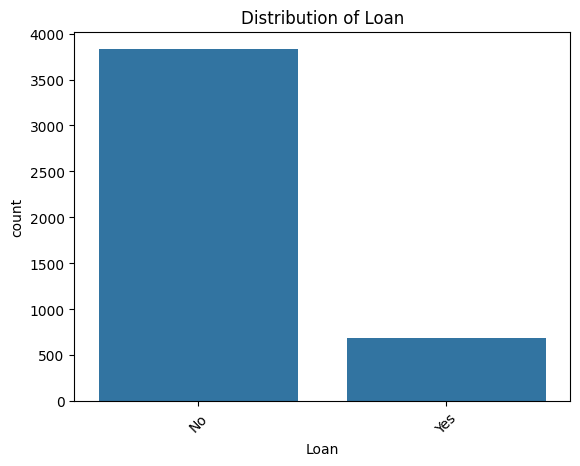

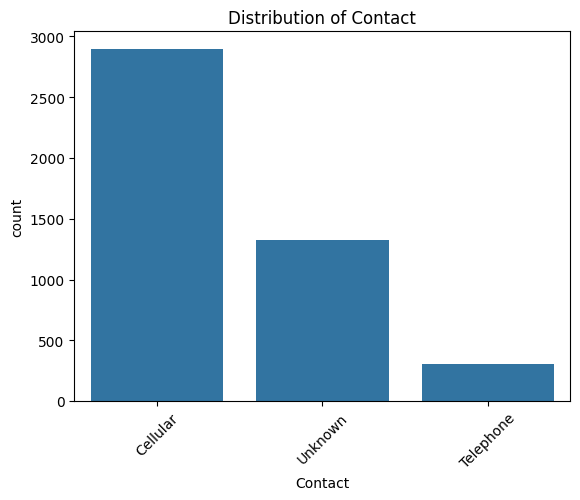

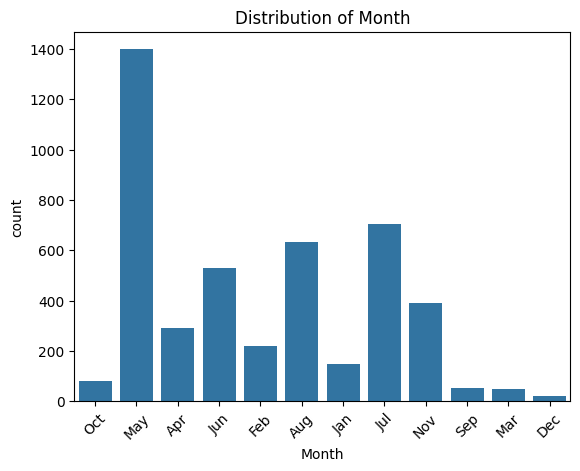

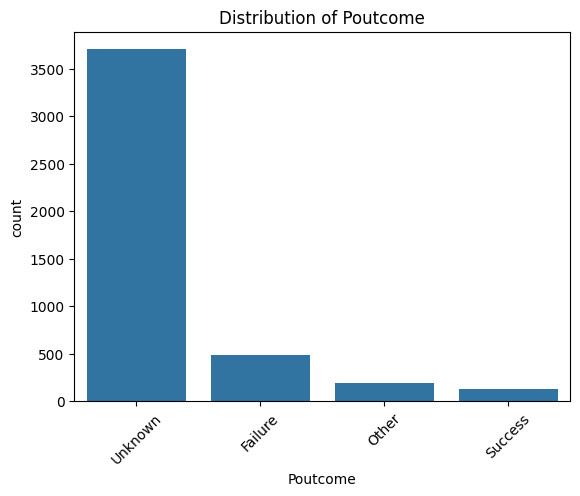

In [ ]:
# Bar plots for categorical features
categorical_features = ['Job', 'Marital', 'Education', 'Default', 'Housing', 'Loan', 'Contact', 'Month', 'Poutcome']

for feature in categorical_features:
    sns.countplot(data=dataset, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

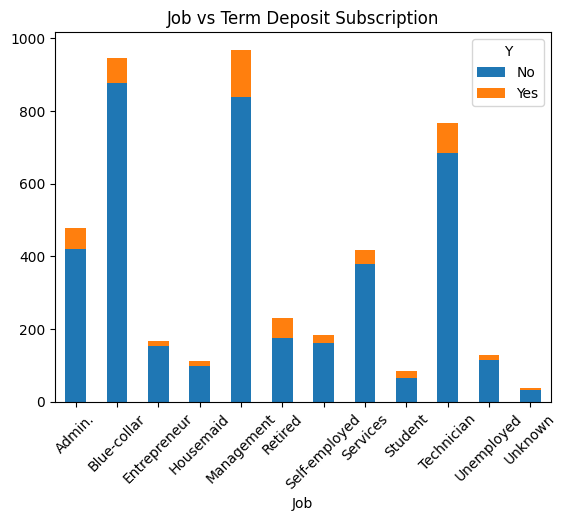

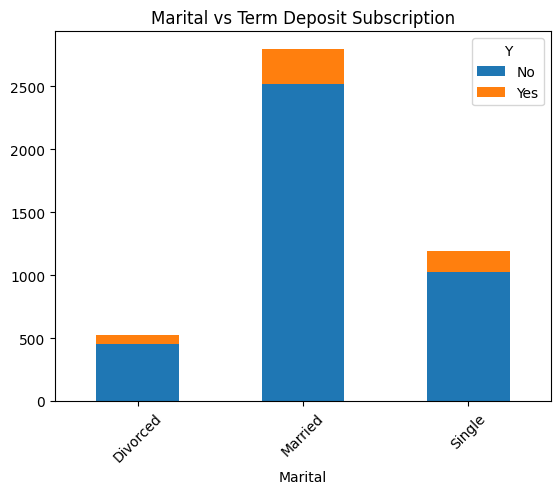

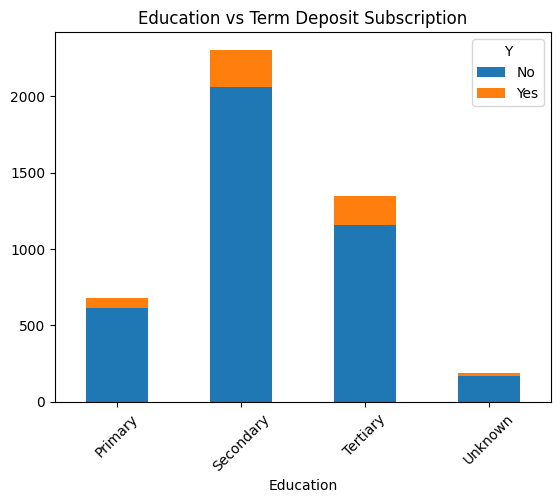

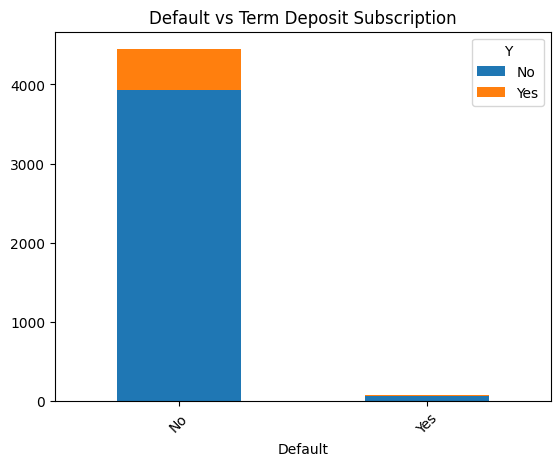

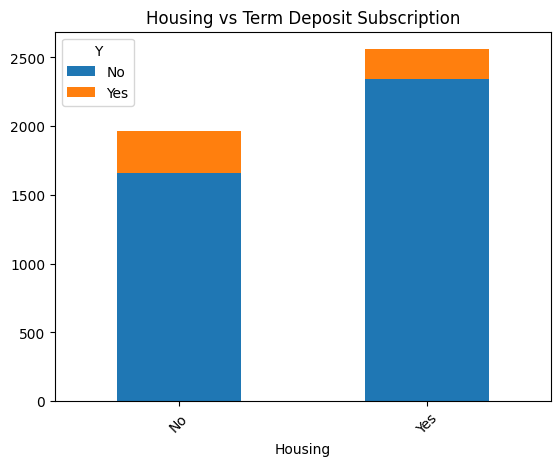

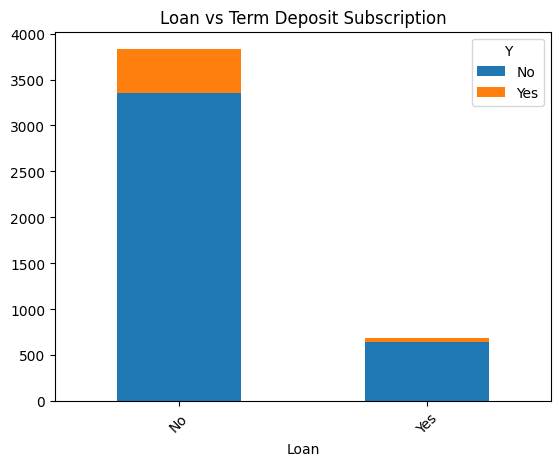

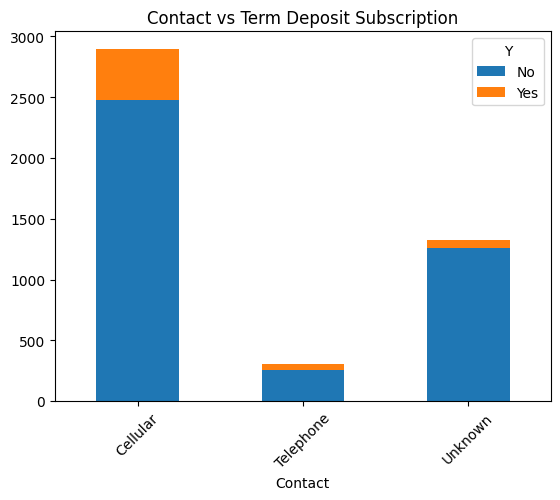

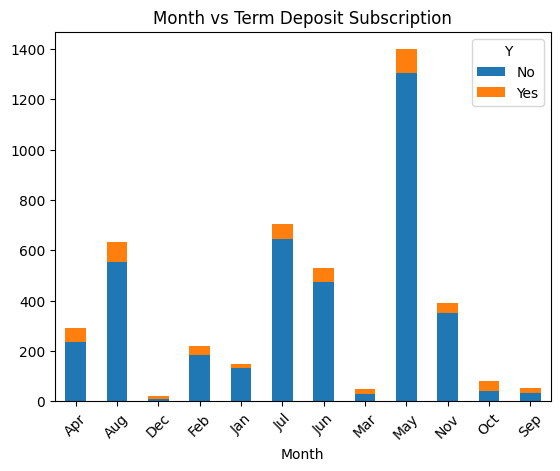

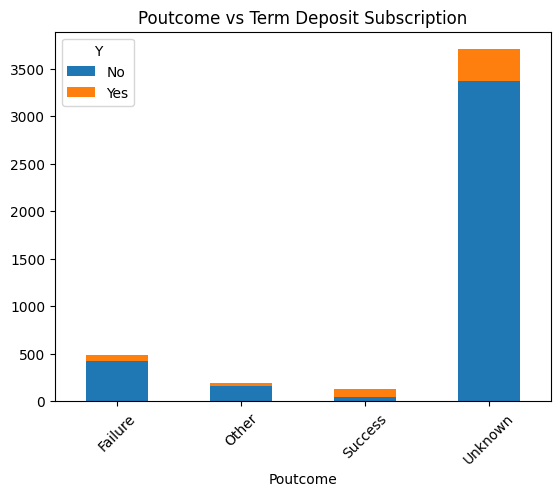

Y                    No       Yes
Job                              
Admin.         0.878661  0.121339
Blue-collar    0.927061  0.072939
Entrepreneur   0.910714  0.089286
Housemaid      0.875000  0.125000
Management     0.864809  0.135191
Retired        0.765217  0.234783
Self-employed  0.890710  0.109290
Services       0.908873  0.091127
Student        0.773810  0.226190
Technician     0.891927  0.108073
Unemployed     0.898438  0.101562
Unknown        0.815789  0.184211


In [ ]:
# Stacked bar plot to see relationship between categorical features and target 'y'
for feature in categorical_features:
    pd.crosstab(dataset[feature], dataset['Y']).plot(kind='bar', stacked=True)
    plt.title(f'{feature} vs Term Deposit Subscription')
    plt.xticks(rotation=45)
    plt.show()

# Crosstab for a categorical feature (example with 'job')
crosstab_result = pd.crosstab(dataset['Job'], dataset['Y'], normalize='index')  # Normalized to show percentages
print(crosstab_result)

In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test for a categorical feature (e.g., job)
contingency_table = pd.crosstab(dataset['Job'], dataset['Y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test result for 'job': p-value = {p}")

Chi-square test result for 'job': p-value = 1.901391096662705e-10
